In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
img = cv2.imread("elephant.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [4]:
img.shape

(330, 500, 3)

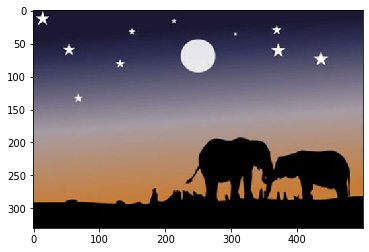

In [5]:
plt.imshow(img)
plt.show()

In [6]:
X = img.reshape((-1, 3))

In [7]:
X.shape

(165000, 3)

In [8]:
from sklearn.cluster import KMeans

In [9]:
k = 10
km = KMeans(n_clusters=k)

In [10]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
km.cluster_centers_

array([[134.99579932, 128.15225489, 143.47721328],
       [  1.33787989,   0.74567399,   1.09443071],
       [ 49.99525469,  49.36664937,  83.18143397],
       [180.2639496 , 142.33209051, 115.25334276],
       [233.03863466, 232.72993248, 236.97074269],
       [192.05525483, 128.66565905,  71.32063269],
       [ 79.8742247 ,  77.89196828, 105.06233807],
       [ 30.92198582,  27.00285367,  53.51177137],
       [107.21063279, 103.28645412, 124.93332254],
       [165.96227312, 151.21936041, 152.05514261]])

In [12]:
centers = np.array(km.cluster_centers_, dtype="uint")

In [13]:
# centers => colors
centers

array([[134, 128, 143],
       [  1,   0,   1],
       [ 49,  49,  83],
       [180, 142, 115],
       [233, 232, 236],
       [192, 128,  71],
       [ 79,  77, 105],
       [ 30,  27,  53],
       [107, 103, 124],
       [165, 151, 152]], dtype=uint64)

### Plot the colors

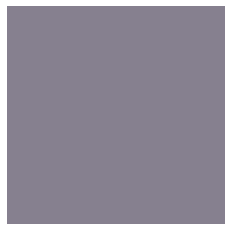

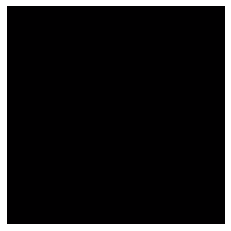

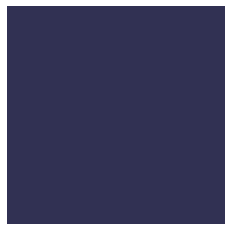

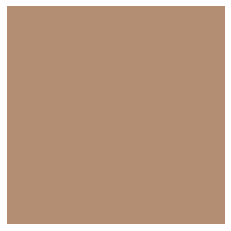

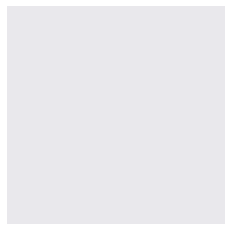

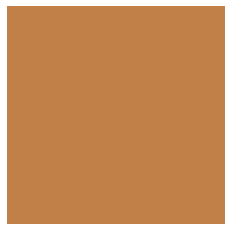

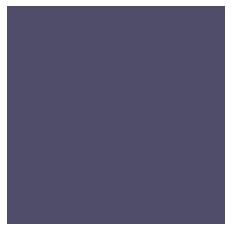

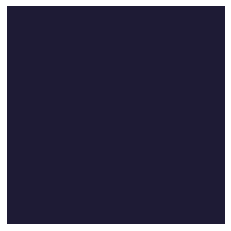

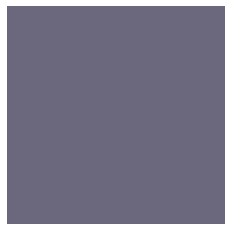

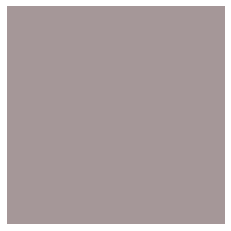

In [14]:
for c in centers:
    a = np.zeros((10,10,3), dtype = 'uint')
    a[:, :, :] = c
    
    plt.imshow(a)
    plt.axis("off")
    plt.show()

In [15]:
km.labels_

array([7, 7, 7, ..., 1, 1, 1], dtype=int32)

In [16]:
new_img = np.zeros((X.shape[0], 3), dtype="uint")

In [17]:
new_img.shape

(165000, 3)

In [18]:
# giving appropriate colors to the pixel/data points of new image
for ix in range(X.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

In [19]:
new_img

array([[30, 27, 53],
       [30, 27, 53],
       [30, 27, 53],
       ...,
       [ 1,  0,  1],
       [ 1,  0,  1],
       [ 1,  0,  1]], dtype=uint64)

In [20]:
new_img.shape

(165000, 3)

In [21]:
new_img = new_img.reshape((330,500,3))

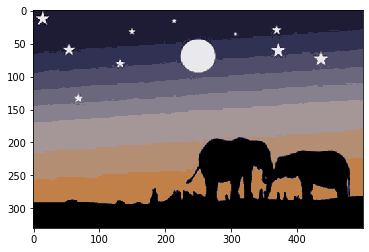

In [22]:
plt.imshow(new_img)
plt.show()